<a href="https://colab.research.google.com/github/shadab4150/X_Ray_Covid_19_pnemonia_detection_lung_segmentation/blob/master/Lungs_Inference_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files

In [0]:
!pip install wget

In [0]:
url_pvb = 'https://drive.google.com/uc?export=download&id=1-1inW6iLwXsYMm6ZLEkcPbDOHmn0NuDl'   #pne_vb
url_mask = 'https://drive.google.com/uc?export=download&id=1D9gc97DdlLjp5JJeTdECkkMp9BRAFt4v'  #mask
url_np = 'https://drive.google.com/uc?export=download&id=1-0SLxDI8K1Bn7-NyIs3Ai4CdEH_S0vd1'   # nor pne

In [0]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as immg
import gc
import numpy as np
from scipy import signal
from scipy import misc
from PIL import Image
import wget
import ipywidgets as widgets
import warnings
warnings.filterwarnings("ignore")


In [0]:
wget.download(url_pvb, '/content/virusbac.pkl')
wget.download(url_np, '/content/nor_pne.pkl')
#wget.download(url_mask, '/content/chest_mask.pkl')

In [0]:
data_pnClass = ['Normal', 'Pnemonia']
data_Vb = ['Viral', 'bacterial']

In [0]:
NP = load_learner('/content/','nor_pne.pkl')
VB = load_learner('/content/','virusbac.pkl')
mask = load_learner('/content/drive/My Drive/Dataset','chest_mask.pkl')

In [0]:
def chest_predict(o):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  print('--'*25)
  print('**'*25)
  f = '/content/'+str(fn)
  img = open_image(f)
  img.show(figsize=(6,6),title='Original Image',cmap='winter')
  pred=mask.predict(img)[0]
  a = data_pnClass[int(NP.predict(img)[0])]
  print("Prediction : ")
  print('**'*25)
  if a!='Normal':
    print(a)
    print('Category: ',data_Vb[int(VB.predict(img)[0])])
  else:
    print(a)
  im = Image.open(f)
  pred.show(figsize=(6,6),alpha=0.9,title='Chest X Ray with predicted Lung mask')
  plt.imshow(np.asarray(im.resize((128, 128))),alpha=0.7)

In [0]:
w = widgets.Button(description = 'Upload and Predict')
w.on_click(chest_predict);

Button(description='Upload and Predict', style=ButtonStyle())

Saving 41591_2020_819_Fig1_HTML.webp-day10.png_I.png to 41591_2020_819_Fig1_HTML.webp-day10.png_I (6).png
User uploaded file "41591_2020_819_Fig1_HTML.webp-day10.png_I.png" with length 45160 bytes
--------------------------------------------------
**************************************************
Prediction : 
**************************************************
Pnemonia
Category:  Viral


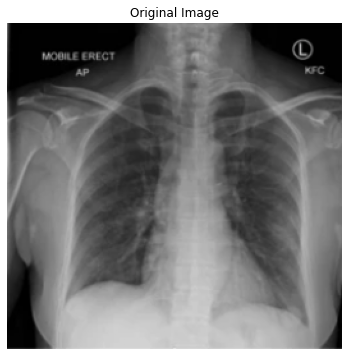

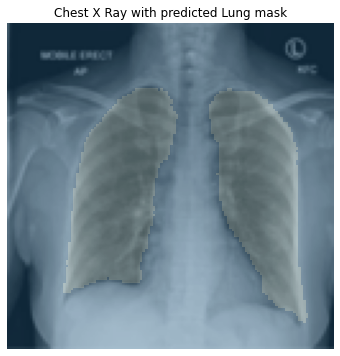

In [84]:
w